In [4]:
pip install jedi==0.17.2

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jedi==0.17.2 in d:\anaconda\lib\site-packages (0.17.2)



In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df=pd.read_csv("PCA.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [72]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [73]:
x=df.drop(['label'],axis=1)
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y=df['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [76]:
x=sc.fit_transform(x)

In [77]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x)

In [16]:
x_pca

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
        -9.56006251e-16,  1.59648796e-15, -2.98066339e-16],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
        -5.08967682e-16,  4.89222952e-15, -4.01251883e-16],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
        -2.91500251e-18, -9.10187708e-18, -6.64302779e-18],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
         1.50809686e-18,  7.25263318e-18, -1.30646474e-17],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
         3.45606045e-17, -1.36084171e-18, -3.84695996e-18]])

In [17]:
x_pca.shape

(42000, 784)

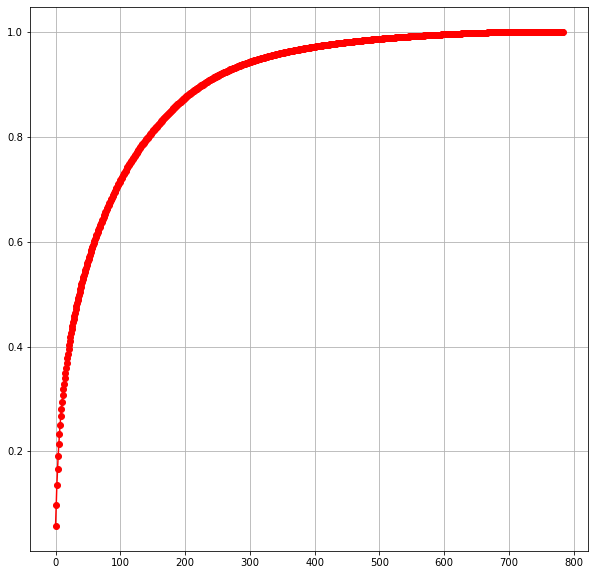

In [18]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

In [79]:
pca_new = PCA(n_components=2)
x_new = pca_new.fit_transform(x)

In [ ]:
# pca_final=PCA(.90)

In [80]:
x_new

array([[-5.14047464, -5.22655176],
       [19.29236433,  6.03251007],
       [-7.64448139, -1.70603603],
       ...,
       [ 0.49541276,  7.07608206],
       [ 2.30722143, -4.34433945],
       [-4.80768635,  1.55912882]])

In [81]:
x_new.shape

(42000, 2)

In [83]:
y.shape

(42000,)

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,train_size=.8,random_state=0)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 2)
(8400, 2)
(33600,)
(8400,)


In [102]:
x_train

array([[ 7.13877114,  2.56206402],
       [11.1137279 ,  2.20663001],
       [-2.25724225,  7.2150951 ],
       ...,
       [-4.96455938,  6.07372417],
       [11.66681897, -6.21137238],
       [-3.7862214 ,  5.00265127]])

In [91]:
x = np.arange(1,10,1).reshape(-1,1)
dataframe = pd.DataFrame.from_records(x_train)

In [92]:
dataframe

,0,1
0,7.138771,2.562064
1,11.113728,2.206630
2,-2.257242,7.215095
3,0.222736,3.152617
4,3.801744,-6.157345
...,...,...
33595,4.344419,1.828312
33596,-6.792287,0.529591
33597,-4.964559,6.073724
33598,11.666819,-6.211372


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

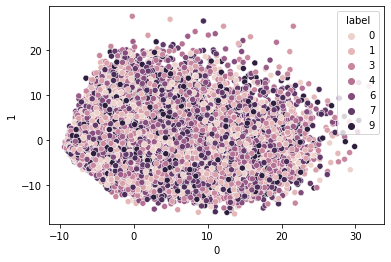

In [93]:
import seaborn as sns
sns.scatterplot(dataframe[0],dataframe[1],hue=y)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [105]:
y_pred=lr.predict(x_test)
y_pred

array([4, 3, 7, ..., 2, 7, 0], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred)

0.3448809523809524

In [110]:
from sklearn.svm import SVC
svc=SVC()

In [111]:
svc.fit(x_train,y_train)

SVC()

In [113]:
y_pred=lr.predict(x_test)
y_pred

array([4, 3, 7, ..., 2, 7, 0], dtype=int64)

In [114]:
accuracy_score(y_test,y_pred)

0.3448809523809524